# Convolutional Neural Network
Here, we will use CNN to run image classification on pnemonia data.

## Import
---
Importing necessary packages and data

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, optimizers

import pickle

import os
import gc
from timeit import default_timer as timer

### Image Directories

In [2]:
train_dir = 'DATA/train'
test_dir = 'DATA/test'
val_dir = 'DATA/validation'

In [3]:
# remove unnecessary variables clogging memory
def clean_up(vars_):
    for var in vars_:
        del var 
    print(gc.collect())

## Preprocess
---

In [16]:
train_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(train_dir,
                                                                  target_size = (150,150), 
                                                                  color_mode='grayscale',
                                                                  class_mode='binary')
val_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(val_dir,
                                                                target_size = (150,150), 
                                                                color_mode='grayscale',
                                                                class_mode='binary')
test_g = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(test_dir,
                                                                target_size = (150,150), 
                                                                color_mode='grayscale',
                                                                class_mode='binary')


Found 4043 images belonging to 2 classes.
Found 1010 images belonging to 2 classes.
Found 586 images belonging to 2 classes.


## Baseline Model
---

In [6]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Evaluation Metrics
Since we don't want to miss any true pneumonia case, we will prioritize the recall score.

In [7]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

In [13]:
# training
start = timer()

history = model.fit(train_g, 
                    epochs=100, 
                    validation_data=val_g, 
                    workers = 7
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
127/127 [==============================] - 71s 556ms/step - loss: 0.0846 - accuracy: 0.9676 - recall: 0.9780 - val_loss: 0.0669 - val_accuracy: 0.9772 - val_recall: 0.9973
Epoch 2/100
127/127 [==============================] - 74s 586ms/step - loss: 0.0740 - accuracy: 0.9711 - recall: 0.9777 - val_loss: 0.0557 - val_accuracy: 0.9812 - val_recall: 0.9907
Epoch 3/100
127/127 [==============================] - 73s 575ms/step - loss: 0.0672 - accuracy: 0.9745 - recall: 0.9813 - val_loss: 0.0477 - val_accuracy: 0.9842 - val_recall: 0.9947
Epoch 4/100
127/127 [==============================] - 73s 573ms/step - loss: 0.0614 - accuracy: 0.9745 - recall: 0.9807 - val_loss: 0.0475 - val_accuracy: 0.9822 - val_recall: 0.9867
Epoch 5/100
127/127 [==============================] - 73s 572ms/step - loss: 0.0576 - accuracy: 0.9770 - recall: 0.9830 - val_loss: 0.0554 - val_accuracy: 0.9812 - val_recall: 0.9787
Epoch 6/100
127/127 [==============================] - 73s 576ms/step - loss: 0.

127/127 [==============================] - 72s 567ms/step - loss: 0.0023 - accuracy: 0.9990 - recall: 0.9993 - val_loss: 0.0698 - val_accuracy: 0.9881 - val_recall: 0.9947
Epoch 46/100
127/127 [==============================] - 72s 567ms/step - loss: 0.0013 - accuracy: 0.9993 - recall: 0.9997 - val_loss: 0.0629 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 47/100
127/127 [==============================] - 72s 566ms/step - loss: 0.0018 - accuracy: 0.9998 - recall: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 48/100
127/127 [==============================] - 72s 567ms/step - loss: 0.0020 - accuracy: 0.9995 - recall: 0.9993 - val_loss: 0.0868 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 49/100
127/127 [==============================] - 72s 566ms/step - loss: 6.6319e-04 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 50/100
127/127 [==============================] - 72s 569ms/step - loss: 2.519

Epoch 89/100
127/127 [==============================] - 72s 569ms/step - loss: 0.0016 - accuracy: 0.9998 - recall: 1.0000 - val_loss: 0.1436 - val_accuracy: 0.9881 - val_recall: 0.9933
Epoch 90/100
127/127 [==============================] - 72s 568ms/step - loss: 4.2941e-07 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1360 - val_accuracy: 0.9891 - val_recall: 0.9933
Epoch 91/100
127/127 [==============================] - 72s 567ms/step - loss: 3.0501e-06 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.3077 - val_accuracy: 0.9743 - val_recall: 1.0000
Epoch 92/100
127/127 [==============================] - 73s 573ms/step - loss: 0.0015 - accuracy: 0.9998 - recall: 0.9997 - val_loss: 0.1359 - val_accuracy: 0.9861 - val_recall: 0.9933
Epoch 93/100
127/127 [==============================] - 73s 573ms/step - loss: 6.9887e-07 - accuracy: 1.0000 - recall: 1.0000 - val_loss: 0.1339 - val_accuracy: 0.9881 - val_recall: 0.9933
Epoch 94/100
127/127 [==============================] - 73s 578

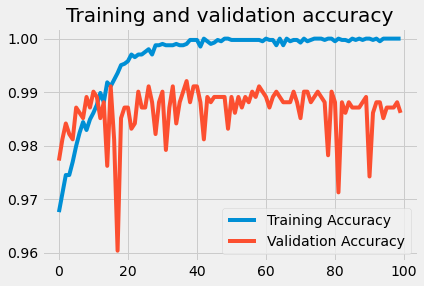

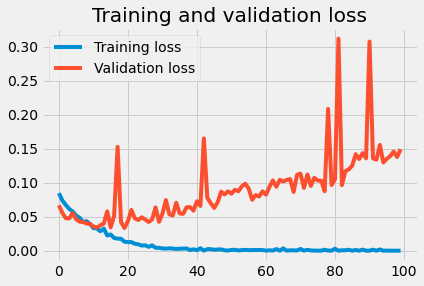

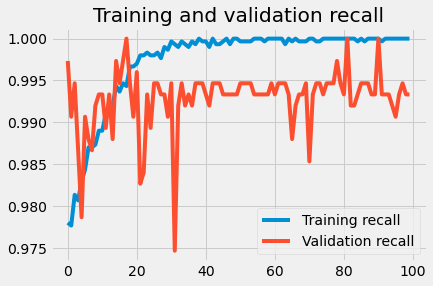

In [14]:
# plot performance
def plot_performance(hist):
    hist_ = hist.history
    epochs = hist.epoch

    plt.plot(epochs, hist_['accuracy'], label='Training Accuracy')
    plt.plot(epochs, hist_['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, hist_['loss'], label='Training loss')
    plt.plot(epochs, hist_['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, hist_['recall'], label='Training recall')
    plt.plot(epochs, hist_['val_recall'], label='Validation recall')
    plt.title('Training and validation recall')
    plt.legend()
    
    plt.show()
    
plot_performance(history)

In [15]:
# saving model
os.mkdir('MODEL')
model.save('MODEL/baseline_model.h5')

It seems like around 16-18 is ideal number of epoch.

In [34]:
#testing
hist_test = model.evaluate(test_g, workers = 7)

19/19 [==============================] - 3s 160ms/step - loss: 0.4308 - accuracy: 0.8976 - recall: 0.9972


In [25]:
print('test_loss: ', hist_test[0], 'test_accuracy: ', hist_test[1], 'test_recall: ', hist_test[2])

test_loss:  0.6474769711494446 test_accuracy:  0.8566552996635437 test_recall:  0.9971590638160706


It seems like the testing loss is much higher compared to the training loss. This will benefit from having more data. So we will implement data augmentation.

## Data Augmentation
---

### Model 1 
Baseline model with more data (augmented) + epochs

In [30]:
data_aug_train = image.ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2,
                                   brightness_range = [0.5, 1.0],
                                   zoom_range = 0.2)

train_g2 = data_aug_train.flow_from_directory(train_dir,
                                              target_size = (150,150), 
                                              color_mode='grayscale',
                                              class_mode='binary')


Found 4043 images belonging to 2 classes.


Epoch 1/100
100/100 [==============================] - 65s 651ms/step - loss: 0.5636 - accuracy: 0.7347 - recall: 0.9873 - val_loss: 0.5059 - val_accuracy: 0.7426 - val_recall: 1.0000
Epoch 2/100
100/100 [==============================] - 64s 644ms/step - loss: 0.4909 - accuracy: 0.7581 - recall: 0.9322 - val_loss: 0.3510 - val_accuracy: 0.8376 - val_recall: 0.9587
Epoch 3/100
100/100 [==============================] - 64s 644ms/step - loss: 0.4236 - accuracy: 0.8009 - recall: 0.8974 - val_loss: 0.4048 - val_accuracy: 0.7960 - val_recall: 0.9813
Epoch 4/100
100/100 [==============================] - 63s 634ms/step - loss: 0.3811 - accuracy: 0.8245 - recall: 0.9041 - val_loss: 0.5176 - val_accuracy: 0.7248 - val_recall: 0.6293
Epoch 5/100
100/100 [==============================] - 63s 633ms/step - loss: 0.3544 - accuracy: 0.8345 - recall: 0.9043 - val_loss: 0.2347 - val_accuracy: 0.9010 - val_recall: 0.9547
Epoch 6/100
100/100 [==============================] - 64s 642ms/step - loss: 0.

100/100 [==============================] - 64s 640ms/step - loss: 0.1345 - accuracy: 0.9475 - recall: 0.9610 - val_loss: 0.0830 - val_accuracy: 0.9713 - val_recall: 0.9880
Epoch 46/100
100/100 [==============================] - 64s 642ms/step - loss: 0.1226 - accuracy: 0.9547 - recall: 0.9638 - val_loss: 0.0604 - val_accuracy: 0.9802 - val_recall: 0.9840
Epoch 47/100
100/100 [==============================] - 64s 642ms/step - loss: 0.1268 - accuracy: 0.9512 - recall: 0.9653 - val_loss: 0.0855 - val_accuracy: 0.9693 - val_recall: 0.9640
Epoch 48/100
100/100 [==============================] - 64s 639ms/step - loss: 0.1262 - accuracy: 0.9484 - recall: 0.9609 - val_loss: 0.0786 - val_accuracy: 0.9772 - val_recall: 0.9747
Epoch 49/100
100/100 [==============================] - 63s 633ms/step - loss: 0.1311 - accuracy: 0.9484 - recall: 0.9615 - val_loss: 0.0772 - val_accuracy: 0.9733 - val_recall: 0.9853
Epoch 50/100
100/100 [==============================] - 64s 637ms/step - loss: 0.1334 - 

100/100 [==============================] - 64s 635ms/step - loss: 0.0926 - accuracy: 0.9670 - recall: 0.9752 - val_loss: 0.0581 - val_accuracy: 0.9832 - val_recall: 0.9947
Epoch 90/100
100/100 [==============================] - 64s 638ms/step - loss: 0.0972 - accuracy: 0.9648 - recall: 0.9726 - val_loss: 0.0528 - val_accuracy: 0.9842 - val_recall: 0.9827
Epoch 91/100
100/100 [==============================] - 63s 633ms/step - loss: 0.1020 - accuracy: 0.9619 - recall: 0.9709 - val_loss: 0.0746 - val_accuracy: 0.9772 - val_recall: 0.9960
Epoch 92/100
100/100 [==============================] - 63s 634ms/step - loss: 0.0978 - accuracy: 0.9635 - recall: 0.9723 - val_loss: 0.0522 - val_accuracy: 0.9792 - val_recall: 0.9853
Epoch 93/100
100/100 [==============================] - 64s 636ms/step - loss: 0.0984 - accuracy: 0.9660 - recall: 0.9744 - val_loss: 0.0467 - val_accuracy: 0.9812 - val_recall: 0.9880
Epoch 94/100
100/100 [==============================] - 63s 635ms/step - loss: 0.0911 - 

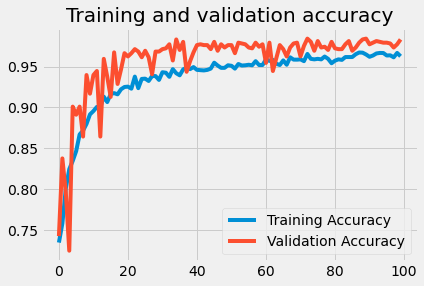

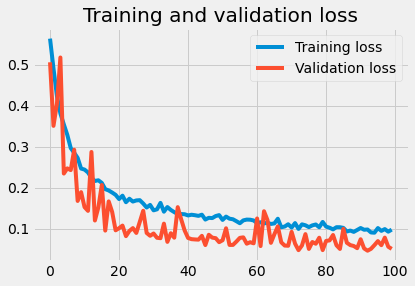

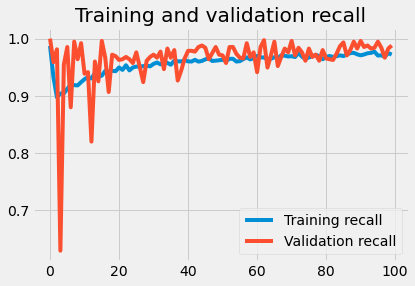

In [31]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

# training
start = timer()

history = model.fit(train_g2, 
                    steps_per_epoch = 100,
                    epochs=100, 
                    validation_data=val_g, 
                    workers = 7
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

plot_performance(history)

In [33]:
# saving model
model.save('MODEL/baseline_aug1.h5')

In [34]:
#testing
hist_test = model.evaluate(test_g, workers = 7)

19/19 [==============================] - 3s 160ms/step - loss: 0.4308 - accuracy: 0.8976 - recall: 0.9972


In [35]:
print('test_loss: ', hist_test[0], 'test_accuracy: ', hist_test[1], 'test_recall: ', hist_test[2])

test_loss:  0.4308163523674011 test_accuracy:  0.8976109027862549 test_recall:  0.9971590638160706


Validation loss is consistently less than training loss. This is probably because the data augmentation is resulting in data that is more difficult to figure out. Additionally training loss seems to be plateauing at around 0.1, so adding a bit more layer might help.

### Model 2 
This time we will add one more convolutional layer and run it for slightly more epochs. I'll also slightly reduce the degree of augmentation.

In [37]:
data_aug_train2 = image.ImageDataGenerator(rescale = 1/255,
                                   width_shift_range = 0.1, 
                                   height_shift_range = 0.1,
                                   brightness_range = [0.7, 1.0],
                                   zoom_range = 0.1)

train_g3 = data_aug_train.flow_from_directory(train_dir,
                                              target_size = (150,150), 
                                              color_mode='grayscale',
                                              class_mode='binary')

Found 4043 images belonging to 2 classes.


In [ ]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy', 'Recall'])

# training
start = timer()

history = model.fit(train_g3, 
                    steps_per_epoch = 100,
                    epochs=120, 
                    validation_data=val_g, 
                    workers = 7
                   )

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

plot_performance(history)

Epoch 1/120
100/100 [==============================] - 72s 722ms/step - loss: 0.5581 - accuracy: 0.7450 - recall: 1.0000 - val_loss: 0.5685 - val_accuracy: 0.7426 - val_recall: 1.0000
Epoch 2/120
100/100 [==============================] - 71s 707ms/step - loss: 0.4694 - accuracy: 0.7741 - recall: 0.9263 - val_loss: 0.3253 - val_accuracy: 0.8376 - val_recall: 0.9587
Epoch 3/120
100/100 [==============================] - 72s 717ms/step - loss: 0.4178 - accuracy: 0.7969 - recall: 0.8807 - val_loss: 0.2538 - val_accuracy: 0.9099 - val_recall: 0.9200
Epoch 4/120
100/100 [==============================] - 72s 716ms/step - loss: 0.3892 - accuracy: 0.8163 - recall: 0.8829 - val_loss: 0.2375 - val_accuracy: 0.8960 - val_recall: 0.9347
Epoch 5/120
100/100 [==============================] - 71s 711ms/step - loss: 0.3683 - accuracy: 0.8278 - recall: 0.8995 - val_loss: 0.2383 - val_accuracy: 0.9000 - val_recall: 0.9507
Epoch 6/120
100/100 [==============================] - 71s 706ms/step - loss: 0.

In [34]:
#testing
hist_test = model.evaluate(test_g, workers = 7)

19/19 [==============================] - 3s 160ms/step - loss: 0.4308 - accuracy: 0.8976 - recall: 0.9972


In [35]:
print('test_loss: ', hist_test[0], 'test_accuracy: ', hist_test[1], 'test_recall: ', hist_test[2])

test_loss:  0.4308163523674011 test_accuracy:  0.8976109027862549 test_recall:  0.9971590638160706


## Feature Extraction
---


## Pretrained Network Method 2
requires GPU

---
### 

# Final Model Performance
---
Testing the final models on the testset

In [27]:
#testing
hist_test = model.evaluate(test_g, workers = 7)

In [28]:
print('test_loss: ', hist_test[0], 'test_accuracy: ', hist_test[1], 'test_recall: ', hist_test[2])